# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## План исследования

#### Шаг 1. Откроем таблицу и изучим общую информацию о данных

#### Шаг 2. Предобработка данных
- определим и заполним пропущенные значения
- заменим тип данных 
- удалим дубликаты
- категоризируем данные

#### Шаг 3. Посчитаем и добавим в таблицу:
- цена квадратного метра
- день недели, месяц, год публикации объявления
- этаж квартиры, варианты - первый, последний, другой
- соотношение жилой и общей площади, а также отношение площади кухни к общей

#### Шаг 4. Выполним задания:
- Изучите параметры: площадь, цена, число комнат, высотка потолков, постройте гистограммы для каждого параметра
- Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
- Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили
- Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
- Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.
- Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

#### Шаг 4. Общий вывод и итоги

## Описание данных:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
#добавим как разделитель знак табуляции \t
real_estate_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#отключим дефолтное ограничение количества столбцов, чтобы была видна вся таблица
pd.set_option('display.max_columns', None)
#просмотрим первые 10 строк таблицы
real_estate_data.head(10)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
#просмотрим инфо таблицы
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Таблица содержит данные о недвижимости и ее характеристиках. Проблемы в данных, которые видны с первого взгляда - это пропуски, наличие вещественного типа данных, который для удобства лучше привести к целочисленному.

Данные по столбцам airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest получены автоматически с помощью картографических сервисов, следовательно пропуски по этим столбцам можно учитывать как отсутствие аэропота, центра города и т.д. на ближайшем расстоянии от объекта недвижимости.

Данные по другим столбцам заполнялись вручную продавцами недвижимости и пропуски можно объяснить как случайные (забыли заполнить, указать) или наоборот не случайные, например, пропуски по столбцу balcony могут означать отсутствие балкона в квартире.

### Шаг 2. Предобработка данных

### Обработка пропусков

In [4]:
real_estate_data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
#заполним пропуски в столбце ceiling_height медианным значением по данному столбцу
median_ceiling_height = real_estate_data['ceiling_height'].median()
real_estate_data['ceiling_height'] = real_estate_data['ceiling_height'].fillna(median_ceiling_height)
median_ceiling_height

2.65

In [6]:
#заполним пропуски в столбце floors_total медианным значением по данному столбцу
median_floors_total = real_estate_data['floors_total'].median()
real_estate_data['floors_total'] = real_estate_data['floors_total'].fillna(median_floors_total)

In [7]:
#чтобы заполнить пропуски в столбце living_area, найдем коэфициент корреляции между площадью и количеством комнат, 
#чтобы выяснить, можем ли мы на основе столбца rooms заполнить пропуски
real_estate_data['living_area'].corr(real_estate_data['rooms'])

0.8459774567888746

In [8]:
#заполним пропуски по столбцу living_area медианой, соответственно количеству комнат
median_living_area = real_estate_data.pivot_table(index='rooms', values='living_area', aggfunc='median')

#напишем цикл, чтобы заполнить пропуски в living_area
for i in median_living_area.index:
    real_estate_data.loc[real_estate_data['rooms'] == i, 'living_area'] = real_estate_data.loc[real_estate_data['rooms'] == i, 'living_area'].fillna(median_living_area.loc[i, 'living_area'])


In [9]:
#заполним пропуски в столбце kitchen_area медианным значением, соответственно количеству комнат
median_kitchen_area = real_estate_data.pivot_table(index='rooms', values='kitchen_area', aggfunc='median')

#напишем цикл, чтобы заполнить пропуски в kitchen_area
for i in median_kitchen_area.index:
    real_estate_data.loc[real_estate_data['rooms'] == i, 'kitchen_area'] = real_estate_data.loc[real_estate_data['rooms'] == i, 'kitchen_area'].fillna(median_kitchen_area.loc[i, 'kitchen_area'])

In [10]:
#проверим оставшиеся пропуски
real_estate_data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area              197
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [11]:
#так как некоторых объявлениях количество комнат указано 0, остались пропуски по столбцу kitchen_area
#заполним их медианным значением столбца kitchen_area
median_kitchen_area_2 = real_estate_data['kitchen_area'].median()
real_estate_data['kitchen_area'] = real_estate_data['kitchen_area'].fillna(median_kitchen_area_2)

In [12]:
#удалим пропуски по столбцу locality_name
real_estate_data.dropna(subset = ['locality_name'], inplace = True)

In [13]:
#заполним пропуски по столбцу cityCenters_nearest маркером -777
real_estate_data['cityCenters_nearest'] = real_estate_data['cityCenters_nearest'].fillna(-777)

In [14]:
#заполним пропуски по столбцу days_exposition маркером -777
real_estate_data['days_exposition'] = real_estate_data['days_exposition'].fillna(-777)

In [15]:
real_estate_data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11513
locality_name               0
airports_nearest         5534
cityCenters_nearest         0
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition             0
dtype: int64

### Вывод

При проверке датафрейма обнаружилось множество пропусков в большинстве столбцов, обработали только те столбцы, которые будут полезны при исследовании:
 - Пропуски по столбцу ceiling_height можно объяснить тем, что скорее всего их просто забыли заполнить при подаче объявления. Пропуски заполнили медианным значением по данному столбцу.
 - Пропусков по столбцу floors_total было совсем немного, их так же заменили медианным значением по столбцу.
 - Чтобы заполнить пропуски в living_area наиболее достоверным образом, нашли корреляцию между площадью квартир и количеством комнат, коиффэциент корреляции оказался довольно высок: 0.8. Далее запонили пропуски медианным значением для столбца living_area соответственно количеству комнат.
 - Пропуски по столбцу kitchen_area медианным значением по данному столбцу
 - В столбце locality_name обнаружилось всего 49 пропусков, эти данные удалили, т.к. восстановить их невозможно и нецелесообразно, т.к. пропусков очень мало
 - Пропуски по столбцу cityCenters_nearest заполнялись маркером 777, чтобы позже их легко можно было отсечь. Т.к. эти данные заполнялись автоматически при помощи картографических сервисом, пропуск свидетельствует о том, что ближайший центр слишком далеко от объекта недвижимости.
 - Пропуски по столбцу days_exposition заполнялись маркером 777, чтобы позже их легко можно было отсечь. Скорее всего пропуски свидетельствуют о том, что объявление еще размещено и продажа еще не состоялась.

### Замена типа данных



In [16]:
#просмотрим инфо по данным
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            2760 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 12137 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     23650 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around300

In [17]:
#меняем тип данных с float на int с помощью цикла
for column in ['last_price', 'total_area', 'floors_total', 'living_area', 'kitchen_area', 'cityCenters_nearest', 'days_exposition']:
    real_estate_data[column] = real_estate_data[column].astype(int)

In [18]:
#переведем столбец first_day_exposition в тип данных — datetime
real_estate_data['first_day_exposition']= pd.to_datetime(real_estate_data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

In [19]:
#просмотрим инфо по данным
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null int64
total_area              23650 non-null int64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null int64
living_area             23650 non-null int64
floor                   23650 non-null int64
is_apartment            2760 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null int64
balcony                 12137 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     23650 non-null int64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around3000   

### Вывод

Столбцы с типом данных float перевели в int, для более точной дальнейшей работы с данными.
Столбец first_day_exposition перевели в тип datetime.
В столбце ceiling_height оставили float, т.к. самая распространенная высота потолков - 2.7метра

### Обработка дубликатов

In [20]:
#с помощью метода duplicated().sum() проверим таблицу на дубликаты
real_estate_data.duplicated().sum()

0

### Вывод

Дубликаты не обнаружены.

### Шаг 3. Посчитайте и добавьте в таблицу

In [21]:
#посчитаем и добавим в таблицу цену за квадратный метр
real_estate_data['price'] = real_estate_data['last_price'] / real_estate_data['living_area']
#заменим тип столбца price на целочисленный
real_estate_data['price'] = real_estate_data['price'].astype(int)
real_estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,NaN,False,False,25,NaN,Санкт-Петербург,18863.0,16028,1.0,482.0,2.0,755.0,-777,254901
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,NaN,False,False,11,2.0,посёлок Шушары,12817.0,18603,0.0,NaN,0.0,NaN,81,186111
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,NaN,False,False,8,0.0,Санкт-Петербург,21741.0,13933,1.0,90.0,2.0,574.0,558,152823
3,0,64900000,159,2015-07-24,3,2.65,14,45,9,NaN,False,False,9,0.0,Санкт-Петербург,28098.0,6800,2.0,84.0,3.0,234.0,424,1442222
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,NaN,False,False,41,NaN,Санкт-Петербург,31856.0,8098,2.0,112.0,1.0,48.0,121,312500


In [22]:
#посчитаем и добавим в таблицу день недели, месяц и год публикации объявления
real_estate_data['weekday_name'] = real_estate_data['first_day_exposition'].dt.weekday_name
real_estate_data['month'] = pd.DatetimeIndex(real_estate_data['first_day_exposition']).month
real_estate_data['year'] = pd.DatetimeIndex(real_estate_data['first_day_exposition']).year

In [23]:
real_estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price,weekday_name,month,year
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,NaN,False,False,25,NaN,Санкт-Петербург,18863.0,16028,1.0,482.0,2.0,755.0,-777,254901,Thursday,3,2019
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,NaN,False,False,11,2.0,посёлок Шушары,12817.0,18603,0.0,NaN,0.0,NaN,81,186111,Tuesday,12,2018
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,NaN,False,False,8,0.0,Санкт-Петербург,21741.0,13933,1.0,90.0,2.0,574.0,558,152823,Thursday,8,2015
3,0,64900000,159,2015-07-24,3,2.65,14,45,9,NaN,False,False,9,0.0,Санкт-Петербург,28098.0,6800,2.0,84.0,3.0,234.0,424,1442222,Friday,7,2015
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,NaN,False,False,41,NaN,Санкт-Петербург,31856.0,8098,2.0,112.0,1.0,48.0,121,312500,Tuesday,6,2018


In [24]:
#посчитаем и добавим в таблицу этаж квартиры; варианты — первый, последний, другой
#напишем функцию чтобы распределить значения по категориям
floors_total = real_estate_data['floors_total']
def categorizer_floors(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == floors_total:
        return 'last'
    if floor == 1:
        return 'first'
    return 'other'

real_estate_data['floor_category'] = real_estate_data.apply(categorizer_floors, axis=1)


In [25]:
#посчитаем и добавим в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей
real_estate_data['percent_living_area'] = real_estate_data['living_area'] * 100 / real_estate_data['total_area']
real_estate_data['percent_kitchen_area'] = real_estate_data['kitchen_area'] * 100 / real_estate_data['total_area']
#переведем свежесозданные столбцы в тип int
real_estate_data['percent_living_area'] = real_estate_data['percent_living_area'].astype(int)
real_estate_data['percent_kitchen_area'] = real_estate_data['percent_kitchen_area'].astype(int)

In [26]:
#переведем значения столбца last_price в миллионы для удобства работы с данными
real_estate_data['last_price'] = real_estate_data['last_price'] / 1000000

### Вывод
- Посчитали и добавили в таблицу цену за квадратный метр - это поможет и упростить дальнейшую работу с данными.
- Добавили новые столбцы день недели, месяц, год. Так будет удобней далее исследовать, имеется ли зависимость между стоимостью недвижимости и датой объявления?
- Разбили на категории этажи, это поможет узнать, есть ли зависимость между ценой и этажом?

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Задание 1.
Изучите параметры: площадь, цена, число комнат, высотка потолков, постройте гистограммы для каждого параметра

In [27]:
#изучим параметр площадь
real_estate_data['total_area'].describe()

count    23650.000000
mean        60.100930
std         35.673519
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

In [28]:
#изучим параметр last_price
real_estate_data['last_price'].describe()

count    23650.000000
mean         6.541127
std         10.896399
min          0.012190
25%          3.400000
50%          4.650000
75%          6.799000
max        763.000000
Name: last_price, dtype: float64

In [29]:
#изучим параметр price
real_estate_data['price'].describe()

count    2.365000e+04
mean     1.914752e+05
std      1.896850e+05
min      3.800000e+02
25%      1.275000e+05
50%      1.700000e+05
75%      2.250000e+05
max      2.166333e+07
Name: price, dtype: float64

In [30]:
median_price = real_estate_data['price'].median()
median_price

170000.0

In [31]:
mean_price = real_estate_data['price'].mean()
mean_price

191475.24693446088

In [32]:
#изучим параметр количество комнат
real_estate_data['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [33]:
#изучим параметр высота потолков
real_estate_data['ceiling_height'].describe()

count    23650.000000
mean         2.724311
std          0.989255
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

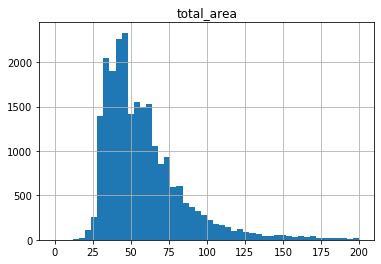

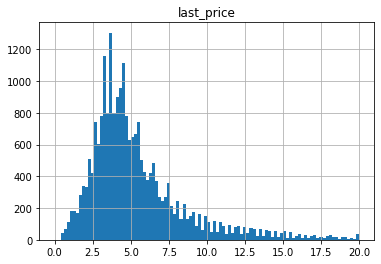

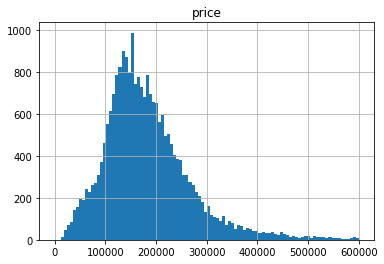

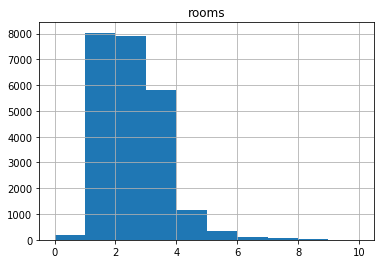

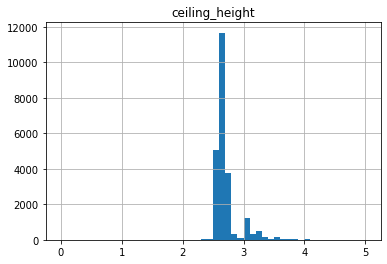

In [34]:
#напишем цикл для создания гистограмм по изучаемым параметрам
dict_for_hist = {'total_area' : [50, (0,200)], 
                 'last_price' : [100, (0, 20)],
                 'price' : [100, (0, 600000)],
                 'rooms' : [10, (0, 10)],
                 'ceiling_height' : [50, (0, 5)]}


for column in dict_for_hist.keys():
    real_estate_data.hist(column, bins = dict_for_hist[column][0], range = dict_for_hist[column][1])
    plt.show()

### Задание 2.
Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [35]:
#отрежем значения помеченные маркером -777
real_estate_data = real_estate_data.query('days_exposition > 0')

In [36]:
#изучим время продажи квартиры
real_estate_data['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [37]:
#посчитаем среднее и медиану, сохраним в переменные
mean_days_exposition = real_estate_data['days_exposition'].mean()
median_days_exposition = real_estate_data['days_exposition'].median()

In [38]:
mean_days_exposition

180.7531998045921

In [39]:
median_days_exposition

95.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9044a2f410>]],
      dtype=object)

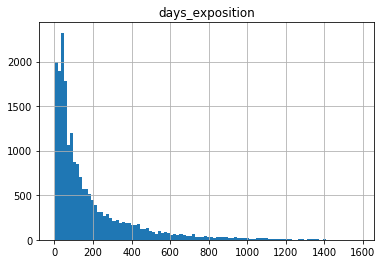

In [40]:
#построим гистограмму для параметра days_exposition
real_estate_data.hist('days_exposition', bins=100)

<font color=blue> Да, так лучше. 
    
---

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9044ab15d0>]],
      dtype=object)

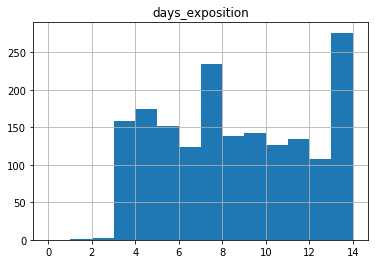

In [41]:
#построим гистограмму для параметра days_exposition в диапазоне от 0 до 14 дней, чтобы определить минимальный срок
#от подачи объявления до продажи недвижимости
real_estate_data.hist('days_exposition', bins=14, range=(0,14))

In [42]:
#создадим столбец too_fast - слишком быстрая продажа
real_estate_data['too_fast'] = real_estate_data['days_exposition'] < 3

In [43]:
real_estate_data['too_fast'].value_counts()

False    20466
True         4
Name: too_fast, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9043eb5790>]],
      dtype=object)

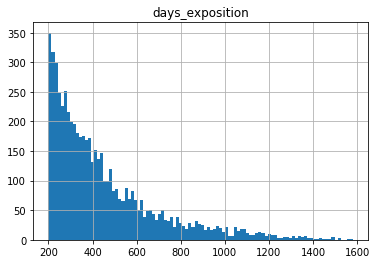

In [44]:
#посмотрим гистограмму в диапазоне от 300 дней до максимального значения по таблице
real_estate_data.hist('days_exposition', bins=100, range=(200,1580))

In [45]:
#создадим столбец too_slow - слишком медленная продажа
real_estate_data['too_slow'] = real_estate_data['days_exposition'] > 365

In [46]:
real_estate_data['too_slow'].value_counts()

False    17436
True      3034
Name: too_slow, dtype: int64

### Вывод

В ходе исследования, выяснилось, что обычно продажа квартиры занимает 95 дней.
Слишком медленными можно считать те продажи, что завершились менее чем через 3 дня от подачи объявления.
Слишком долгие те, что занимают более 300 дней.

### Задание 3.
Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

In [47]:
#удалим маркерные значения cityCenters_nearest
real_estate_data = real_estate_data.query('cityCenters_nearest > 0')

In [48]:
#уберем из таблицы слишком долгие и слишком быстрые продажи
good_real_estate_data = real_estate_data.copy()
good_real_estate_data = real_estate_data.query('too_fast == 0')
good_real_estate_data = real_estate_data.query('too_slow == 0')


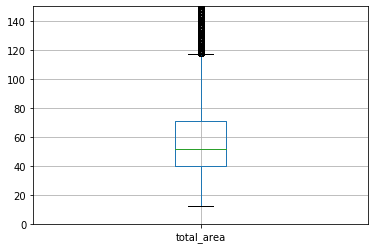

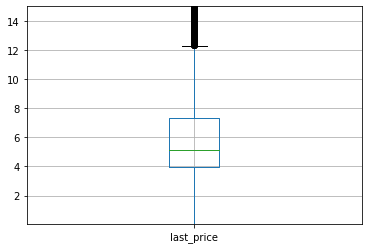

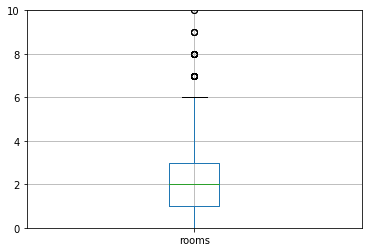

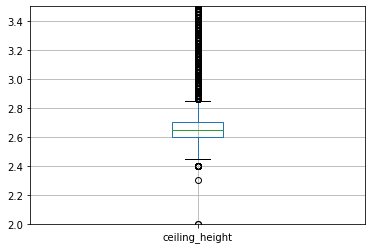

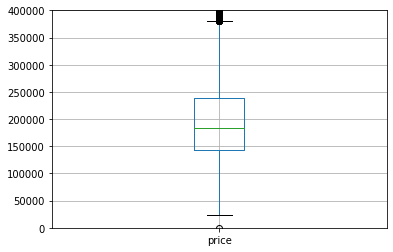

In [49]:
#напишем цикл для создания диаграм размаха по изучаемым параметрам

dict_for_boxplot = {'total_area' : (0, 150),
                 'last_price' : (0.05, 15),
                 'rooms' : (0, 10),
                 'ceiling_height' : (2, 3.5),
                 'price' : (0, 400000)}
 
for column in dict_for_boxplot.keys():
    real_estate_data.boxplot(column)
    plt.ylim(dict_for_boxplot[column])
    plt.show()
    
    

In [50]:
#уберем выбросы по столбцу total_area
good_real_estate_data = good_real_estate_data.query('total_area < 115 and total_area > 10')

In [51]:
#уберем выбросы по столбцу last_price
good_real_estate_data = good_real_estate_data.query('last_price < 12')

In [52]:
#уберем выбросы по столбцу rooms
good_real_estate_data = good_real_estate_data.query('rooms < 6')

In [53]:
#уберем выбросы по столбцу ceiling_height
good_real_estate_data = good_real_estate_data.query('ceiling_height > 2.2 and ceiling_height < 2.8')


In [54]:
#уберем выбросы по столбцу price
good_real_estate_data = good_real_estate_data.query('price < 380000 and price > 50000 ')

### Вывод

Сперва удалили из таблицы слишком быстрые и слишком медленные продажи. Было обнаружено два пика на 45 и 60 дне, можно объяснить это например тем, что система доски объявлений устроена таким образом, что если продавец не обновлял свое объявление по истечении 45 или 60 дней, объявление автоматически снималось.
Затем удалили выбивающиеся значения по столбцам общая площадь, последняя цена, цена за кв метр, количество комнат, высота потолков.

### Задание 4.
Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*.

In [55]:
#изучим корреляцию между ценой и общей площадью кв
good_real_estate_data['last_price'].corr(good_real_estate_data['total_area'])

0.8006775064651966

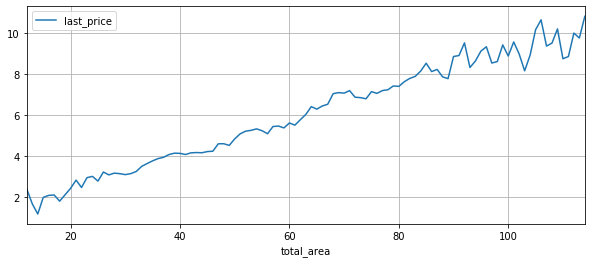

In [56]:
#посторим график зависимости цены от общей площади
(good_real_estate_data
         .pivot_table(index = 'total_area', values='last_price', aggfunc='mean')
         .plot(grid=True, figsize=(10, 4))
)

In [57]:
#изучим корреляцию между ценой и количеством комнат
good_real_estate_data['last_price'].corr(good_real_estate_data['rooms'])

0.529466667678506

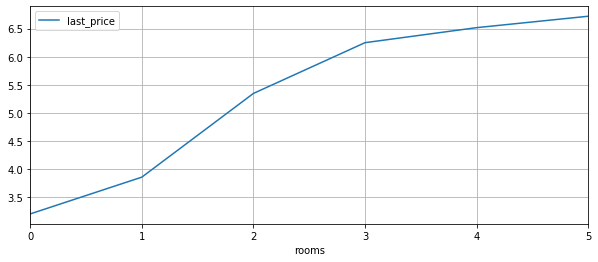

In [58]:
#посторим график зависимости цены от количества комнат
(good_real_estate_data
         .pivot_table(index = 'rooms', values='last_price', aggfunc='mean')
         .plot(grid=True, figsize=(10, 4))
)

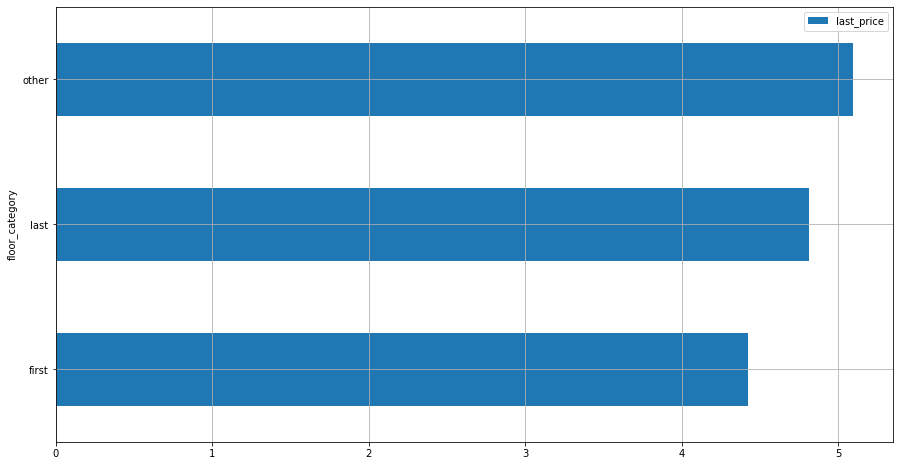

In [59]:
#изучим зависимость между ценой и типом этажа
good_real_estate_data.pivot_table(index = 'floor_category', values =  'last_price', aggfunc = 'mean').plot(kind = 'barh', figsize = (15,8), grid = True)

In [60]:
#изучим корреляцию между ценой и удаленностью от центра
good_real_estate_data['last_price'].corr(good_real_estate_data['cityCenters_nearest'])

-0.2965083527702047

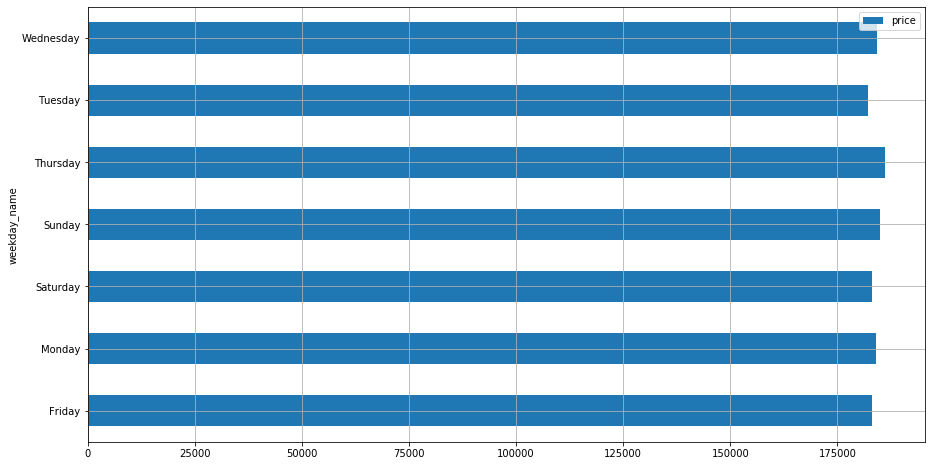

In [61]:
#изучим зависимость между ценой и датой размещения (день недели)
good_real_estate_data.pivot_table(index = 'weekday_name', values =  'price', aggfunc = 'mean').plot(kind = 'barh', figsize = (15,8), grid = True)

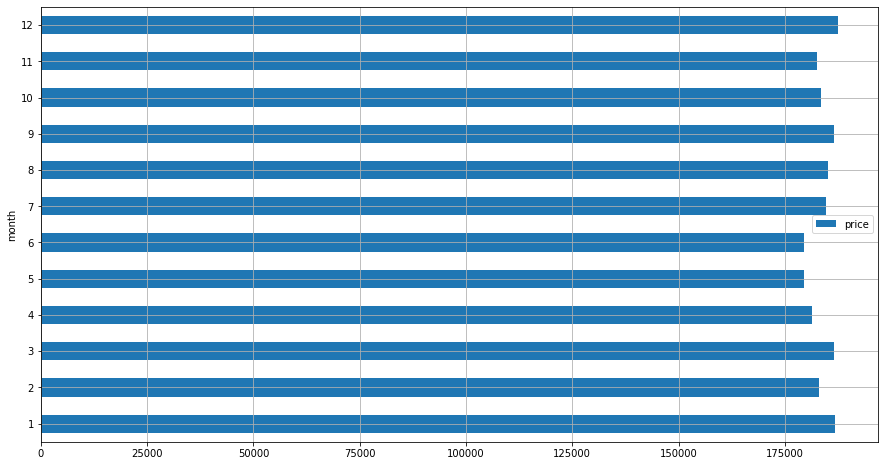

In [62]:
#изучим зависимость между ценой и датой размещения (месяц)
good_real_estate_data.pivot_table(index = 'month', values =  'price', aggfunc = 'mean').plot(kind = 'barh', figsize = (15,8), grid = True)

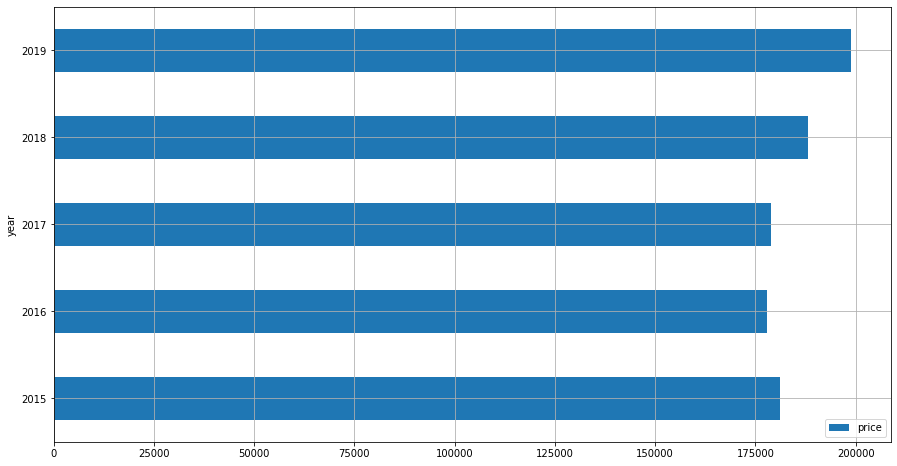

In [63]:
#изучим зависимость между ценой и датой размещения (год)
good_real_estate_data.pivot_table(index = 'year', values =  'price', aggfunc = 'mean').plot(kind = 'barh', figsize = (15,8), grid = True)

In [64]:
#выберем топ-10 населенных пунктов с наибольшим количеством объявлений
top_ten_pivot = good_real_estate_data['locality_name'].value_counts().sort_values(ascending=False)
top_ten_pivot.head(10)

Санкт-Петербург      8703
посёлок Шушары        343
посёлок Парголово     259
Колпино               256
Пушкин                217
Петергоф              137
Красное Село          123
Сестрорецк             88
Ломоносов              82
Кронштадт              62
Name: locality_name, dtype: int64

In [65]:
#сохраним список в отдельный массив
top_ten_city = good_real_estate_data.locality_name.value_counts().sort_values(ascending = False).head(10).index
top_ten_city

Index(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Парголово', 'Колпино',
       'Пушкин', 'Петергоф', 'Красное Село', 'Сестрорецк', 'Ломоносов',
       'Кронштадт'],
      dtype='object')

In [66]:
#посчитаем среднюю цену за кв метр для этих населенных пунктов
mean_price = good_real_estate_data.query('locality_name in @top_ten_city').pivot_table(index = 'locality_name', values='price', aggfunc='mean')
mean_price.sort_values(by = 'price', ascending = False)

,price
locality_name,
посёлок Парголово,198349.795367
Санкт-Петербург,189079.274273
Сестрорецк,188023.136364
Пушкин,182033.129032
посёлок Шушары,157550.017493
Петергоф,144719.189781
Кронштадт,144278.032258
Колпино,131215.132812
Красное Село,127632.715447


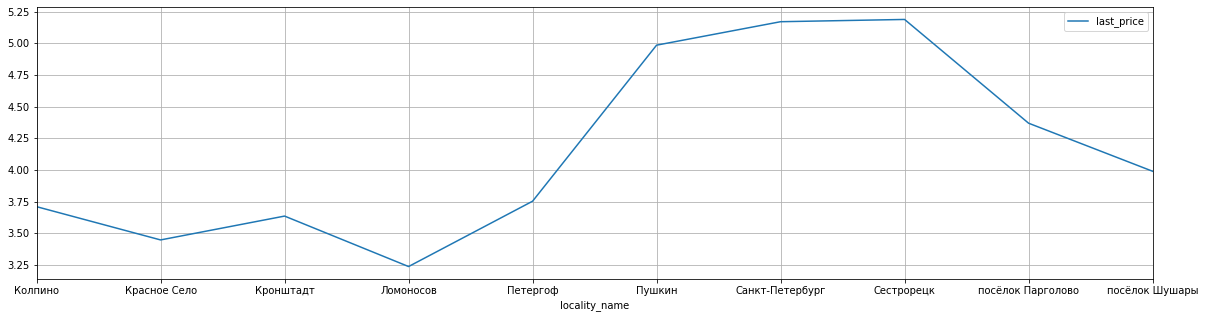

In [67]:
#посторим график зависимости цены от местоположения
(good_real_estate_data
         .query('locality_name in @top_ten_city')
         .pivot_table(index = 'locality_name', values='last_price', aggfunc='mean')
         .plot(grid=True, figsize=(20, 5))
)

### Вывод

Больше всего на стоимость квартиры влияют размер общей площади квартиры, коэффициент корреляции: 0,79. Так же на стоимость влияет количество комнат, коэффициент корреляции: 0,52. 
Если рассматривать зависимость стоимости от этажа, то самые дешевые квартиры будут на первом этаже, далее идет квартиры на последнем этаже и самые дорогие квартиры те, что не на первом и не на последнем этаже. Так же существует зависимость цены от удаленности от центра, чем дальше квартира от центра, тем она дешевле. Коэффициент корреляции: -0,29. Особой зависимости между ценой и днем недели и месяцем размещения не было обнаружено. Зато если смотреть по годам, то после 2017 года стоимость стала активно расти. 
Мы рассмотрели топ-10 населенных пунктов по количеству объявлений, в тройке лидеров посёлок Парголово, Сестрорецк и Санкт-Петербург, средняя стоимость квадратного метра среди них примерно одинаковая. Самая дешевая недвижимость обнаружилась в Ломоносове.

### Задание 5.
Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. 


In [68]:
#сохраним срез по квартирам из Санкт-Петербурга в переменную spb
spb = good_real_estate_data.query('locality_name == "Санкт-Петербург"')

In [69]:
#создадим новый столбец с расстоянием до центра в километрах и переведем в тип int чтобы округлить значения до целых
good_real_estate_data['cityCenters_km'] = (good_real_estate_data['cityCenters_nearest'] / 1000).astype(int)
good_real_estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price,weekday_name,month,year,floor_category,percent_living_area,percent_kitchen_area,too_fast,too_slow,cityCenters_km
1,7,3.35,40,2018-12-04,1,2.65,11,18,1,NaN,False,False,11,2.0,посёлок Шушары,12817.0,18603,0.0,NaN,0.0,NaN,81,186111,Tuesday,12,2018,first,45,27,False,False,18
6,6,3.70,37,2017-11-02,1,2.65,26,10,6,NaN,False,False,14,1.0,посёлок Парголово,52996.0,19143,0.0,NaN,0.0,NaN,155,370000,Thursday,11,2017,other,27,37,False,False,19
9,18,5.40,61,2017-02-26,3,2.50,9,43,7,NaN,False,False,6,2.0,Санкт-Петербург,50898.0,15008,0.0,NaN,0.0,NaN,289,125581,Sunday,2,2017,other,70,9,False,False,15
10,5,5.05,39,2017-11-16,1,2.67,12,20,3,NaN,False,False,8,NaN,Санкт-Петербург,38357.0,13878,1.0,310.0,2.0,553.0,137,252500,Thursday,11,2017,other,51,20,False,False,13
11,9,3.30,44,2018-08-27,2,2.65,5,31,4,False,False,False,6,1.0,Ломоносов,48252.0,51677,0.0,NaN,0.0,NaN,7,106451,Monday,8,2018,other,70,13,False,False,51


In [70]:
#в переменной mean_price_km сохраним сводную таблицу со средней ценой для каждого километра
mean_price_km = good_real_estate_data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'cityCenters_km', values='price', aggfunc='mean')
mean_price_km

,price
cityCenters_km,
0,196864.846154
1,202283.305556
2,188410.217391
3,195366.047619
4,207906.522472
5,206762.290155
6,215551.789855
7,209280.365269
8,193232.600000


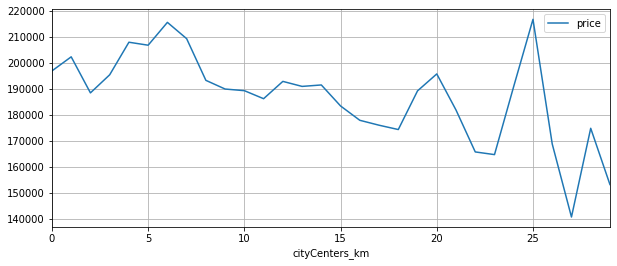

In [71]:
#посторим график зависимости цены от удаленности от центра
(good_real_estate_data
         .query('locality_name == "Санкт-Петербург"')
         .pivot_table(index = 'cityCenters_km', values='price', aggfunc='mean')
         .plot(grid=True, figsize=(10, 4))
)

### Вывод
Рост средней цены за километр начинает расти около 8километров, следовательно можно сделать выводы, что центральная зона начинается до 8 километра включительно


### Задание 6.

Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [72]:
#сохраним в переменной срез по квартирам в центре
flat_centr = good_real_estate_data.query('locality_name == "Санкт-Петербург" and cityCenters_km <= 8')

In [73]:
#изучим параметр площадь на срезе квартиры в центре
flat_centr['total_area'].describe()

count    1156.000000
mean       58.244810
std        20.211559
min        12.000000
25%        43.000000
50%        56.000000
75%        72.000000
max       114.000000
Name: total_area, dtype: float64

In [74]:
#изучим параметр площадь на срезе весь город СПб
spb['total_area'].describe()

count    8703.000000
mean       51.192922
std        17.017570
min        12.000000
25%        38.000000
50%        47.000000
75%        61.000000
max       114.000000
Name: total_area, dtype: float64

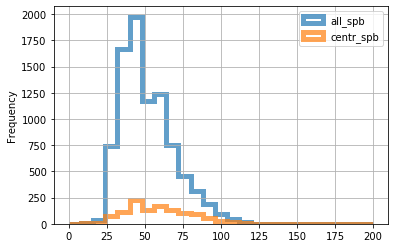

In [75]:
#проверим что изменилось
ax = spb.plot(kind='hist', y='total_area', histtype='step', range=(0, 200), bins=25, linewidth=5, alpha=0.7, label='all_spb')
flat_centr.plot(kind='hist', y='total_area', histtype='step', range=(0, 200), bins=25, linewidth=5, alpha=0.7, label='centr_spb', ax=ax, grid=True, legend=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9044922290>]],
      dtype=object)

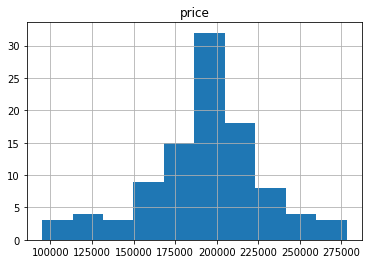

In [76]:
flat_centr.pivot_table(index='total_area', values='price', aggfunc = 'mean').hist()

In [77]:
flat_centr['price'].corr(flat_centr['total_area'])

-0.22943771942038765

In [78]:
#изучим параметр цена за кв метр на срезе квартиры в центре
flat_centr['price'].describe()

count      1156.000000
mean     203058.240484
std       63102.226822
min       54687.000000
25%      154480.000000
50%      193233.000000
75%      240000.000000
max      379411.000000
Name: price, dtype: float64

In [79]:
#изучим параметр цена за кв метр на срезе весь город СПб
spb['price'].describe()

count      8703.000000
mean     189079.274273
std       57088.723870
min       53846.000000
25%      144884.000000
50%      181481.000000
75%      224500.000000
max      379411.000000
Name: price, dtype: float64

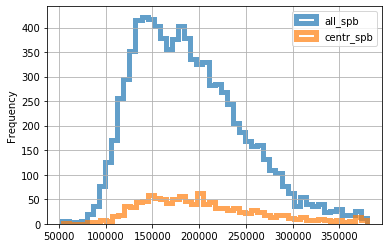

In [80]:
#проверим что изменилось
ax = spb.plot(kind='hist', y='price', histtype='step', bins=50, linewidth=5, alpha=0.7, label='all_spb')
flat_centr.plot(kind='hist', y='price', histtype='step', bins=50, linewidth=5, alpha=0.7, label='centr_spb', ax=ax, grid=True, legend=True)

In [81]:
#изучим параметр количество комнат на срезе квартиры в центре
flat_centr['rooms'].describe()

count    1156.000000
mean        2.103806
std         0.864671
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64

In [82]:
#изучим параметр цена за кв метр на срезе весь город СПб
spb['rooms'].describe()

count    8703.000000
mean        1.892451
std         0.872558
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64

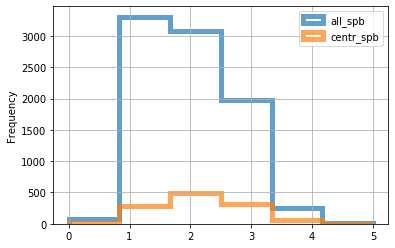

In [83]:
#проверим что изменилось
ax = spb.plot(kind='hist', y='rooms', histtype='step', bins=6, linewidth=5, alpha=0.7, label='all_spb')
flat_centr.plot(kind='hist', y='rooms', histtype='step', bins=6, linewidth=5, alpha=0.7, label='centr_spb', ax=ax, grid=True, legend=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90439528d0>]],
      dtype=object)

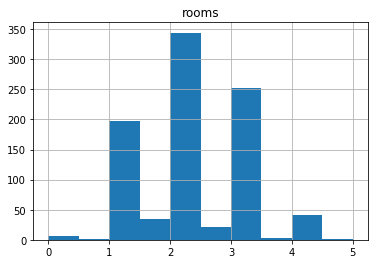

In [84]:
flat_centr.pivot_table(index='price', values='rooms', aggfunc = 'mean').hist()

In [85]:
flat_centr['price'].corr(flat_centr['rooms'])

-0.5061626046782091

In [86]:
#изучим параметр количество высота потолков на срезе квартиры в центре
flat_centr['ceiling_height'].describe()

count    1156.000000
mean        2.634394
std         0.063604
min         2.400000
25%         2.650000
50%         2.650000
75%         2.650000
max         2.790000
Name: ceiling_height, dtype: float64

In [87]:
#изучим параметр цена за кв метр на срезе весь город СПб
spb['ceiling_height'].describe()

count    8703.000000
mean        2.619625
std         0.071662
min         2.300000
25%         2.550000
50%         2.650000
75%         2.650000
max         2.790000
Name: ceiling_height, dtype: float64

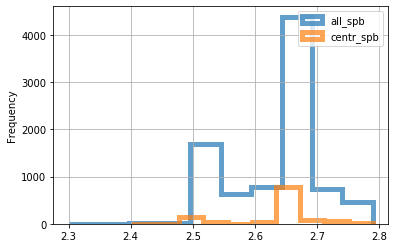

In [88]:
#проверим что изменилось
ax = spb.plot(kind='hist', y='ceiling_height', histtype='step', bins=10, linewidth=5, alpha=0.7, label='all_spb')
flat_centr.plot(kind='hist', y='ceiling_height', histtype='step', bins=10, linewidth=5, alpha=0.7, label='centr_spb', ax=ax, grid=True, legend=True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9043809810>]],
      dtype=object)

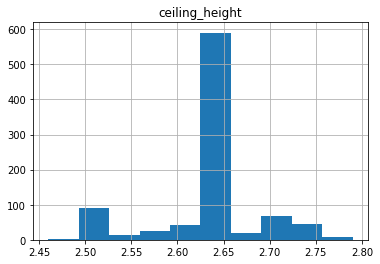

In [89]:
flat_centr.pivot_table(index='price', values='ceiling_height', aggfunc = 'mean').hist()

In [90]:
flat_centr['price'].corr(flat_centr['ceiling_height'])

0.1561086292287875

In [91]:
#содадим новый столбец last_price_center где будет указана цена только объектов из центра спб
good_real_estate_data['last_price_center'] = (good_real_estate_data
                                             .query('locality_name == "Санкт-Петербург" and cityCenters_km <= 8')
                                             ['last_price'])

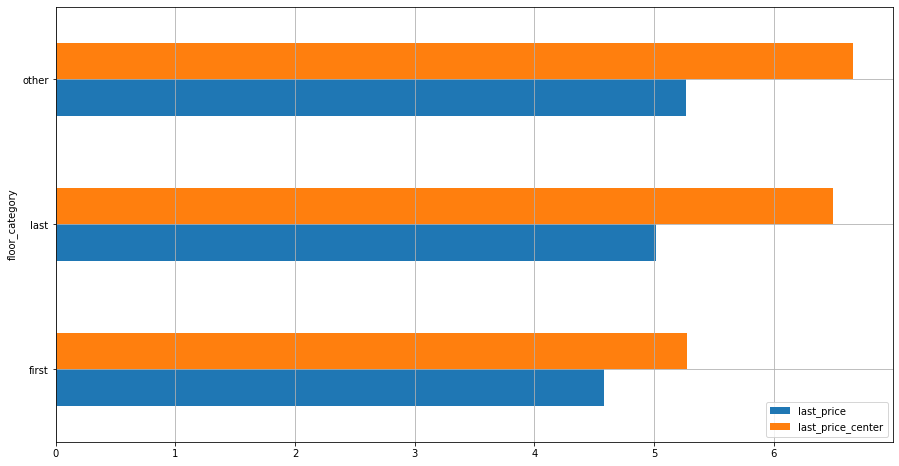

In [92]:
#изучим как влияет на цену этаж во всем городе и только в центре
(good_real_estate_data
               .query('locality_name == "Санкт-Петербург"')
               .pivot_table(index='floor_category', values=['last_price', 'last_price_center'], aggfunc = 'mean')
               .plot(kind = 'barh', figsize = (15,8), grid = True)
              )


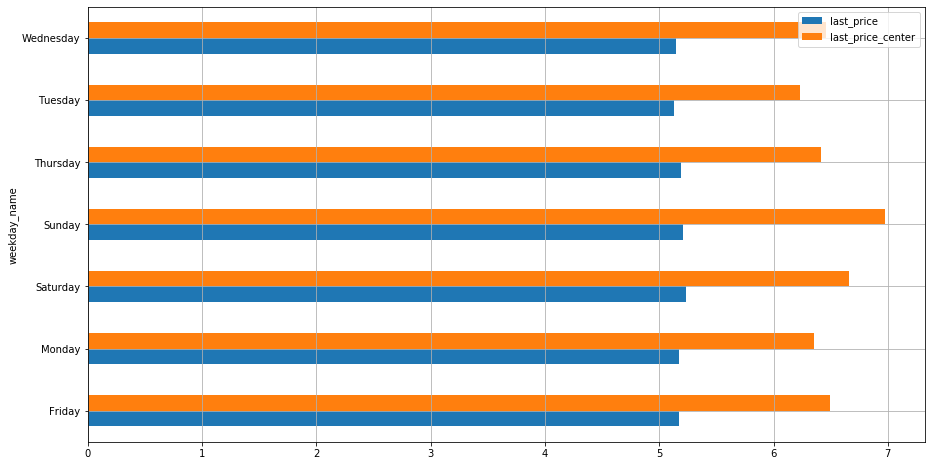

In [93]:
#изучим зависимость между ценой и датой размещения (день недели) в центре и во всем городе
(good_real_estate_data
         .query('locality_name == "Санкт-Петербург"')
         .pivot_table(index = 'weekday_name', values =  ['last_price', 'last_price_center'], aggfunc = 'mean')
         .plot(kind = 'barh', figsize = (15,8), grid = True)
)

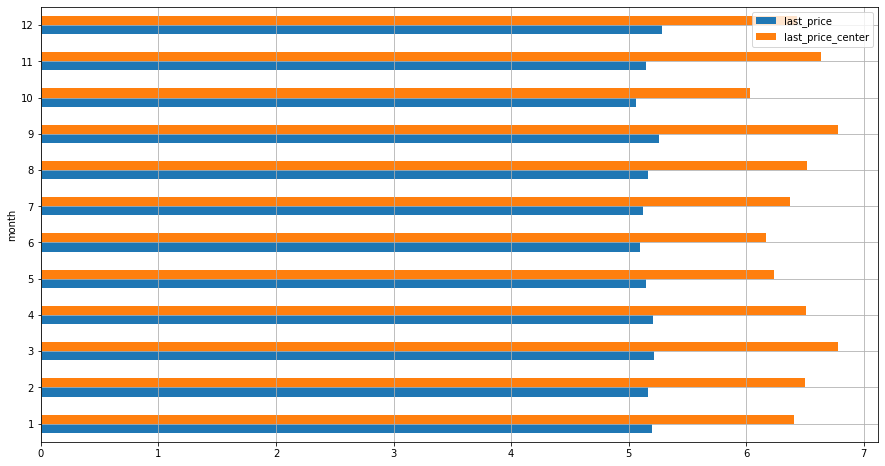

In [94]:
#изучим зависимость между ценой и датой размещения (месяц) в центре и во всем городе
(good_real_estate_data
         .query('locality_name == "Санкт-Петербург"')
         .pivot_table(index = 'month', values =  ['last_price', 'last_price_center'], aggfunc = 'mean')
         .plot(kind = 'barh', figsize = (15,8), grid = True)
)

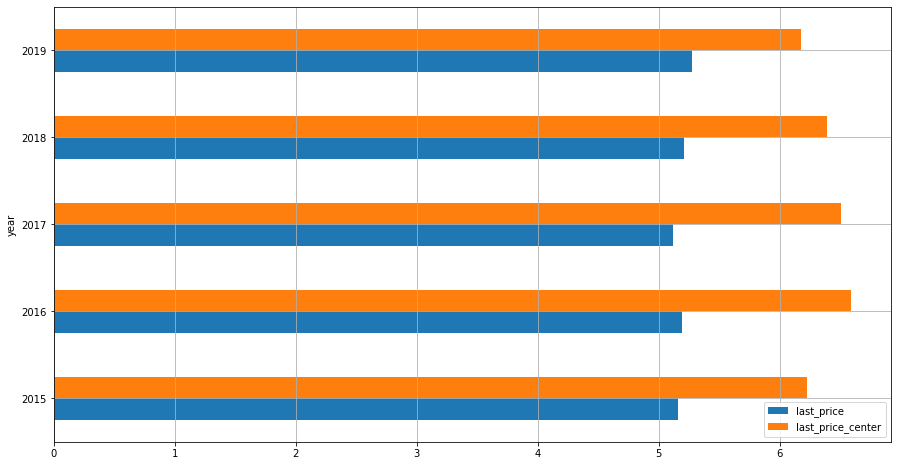

In [95]:
#изучим зависимость между ценой и датой размещения (год) в центре и во всем городе
(good_real_estate_data
         .query('locality_name == "Санкт-Петербург"')
         .pivot_table(index = 'year', values =  ['last_price', 'last_price_center'], aggfunc = 'mean')
         .plot(kind = 'barh', figsize = (15,8), grid = True)
)

### Вывод
Сравнив графики и исследования, можно вынести следующие отличия между центром города и всем городом Санкт-Петербург:
- Общая площадь в центре больше чем по всему городу, 69кв метров против 56кв метров, коэфициент корреляции к стоимости 0.22
- Цена за метр квадратный в центре в среднем больше средней по городу на 20000рублей
- По количеству комнатат примерно одинаково, в среднем в центре больше однушек, по всему городу больше двухкомнатных квартир, зависимость цены от количества комнат довольно высокая, коэфициент корреляции -0.5
- Потолки в центре в среднем выше на 20см, чем среднее значение высоты потолков по всему городу, на цену высота особо не влияет
- Особых отличий по дням недели и месяцам не наблюдается, есть отличия по годам, в центре стоимость недвижимости понемногу снижается с 2016 года, а по всему городу с 2017 наоборот растет.

### Шаг 5. Общий вывод

Чтобы сделать корректные выводы, были посчитаны средние и медианные значения по всем ключевым параметрам, отброшены редкие и аномальные значения. Высчитали среднюю продолжительность продажи недвижимости - 95 дней. Провели исследования по срезам: топ 10 населенных пунктов с самым большим количеством объявлений, срез по городу Санкт-Петербург и отдельно только по центру Санкт-Петербурга.
По результатам исследования, выяснилось, что больше всего на стоимость квартиры влияют следующие параметры:
- размер общей площади квартиры, коэффициент корреляции: 0.78. Этот результат был получен по всем объявлениям, если посмотреть на срез по центру города Санкт-Петербург, то результат будет 0,2. Вероятно это объясняется тем, что в случае недвижимости в центре для покупателя важнее локация, а не площадь квартиры. 
- количество комнат, кэффициент корреляции к цене по всем объявлениям: 0,5. В среднем дороже всего продаются 1-комнатные квартиры
- тип этажа, дешевле всего продают квартиры на первом этаже, далее идут квартиры на последних этажах
- расстояние до центра города, выяснилось что чем ближе недвижимость к центру, тем она дороже, корреляция 0,3